In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import radon

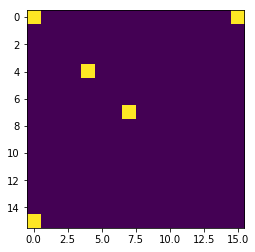

In [2]:
# make image
im = np.zeros(16**2)
im = im.reshape(16,16)
im[0,0] = 1
im[4,4] = 1
im[7,7] = 1
im[0,15] = 1
im[15,0] = 1

plt.imshow(im)
plt.show()

The question is, are these point on a line?
That is, is there a line y=ax+b that passes
through these points for some values of
a and b?

Take every x,y coordinate from the given image and plug it into
the equation b=-xa+y AS PARAMETERS. Then vary a over some
predefined interval and take a look at the lines produced by this:
y = ax + b

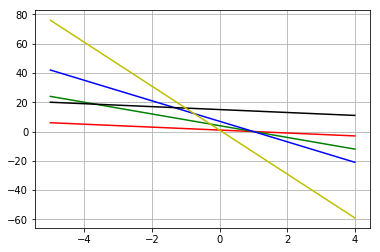

In [3]:
# first point x=0, y=0, b = -a+1
a = np.arange(-5,5)
b = -a + 1
plt.plot(a,b,'r')

# x = 4, y = 4, b = -5a+5
b = -4*a + 4
plt.plot(a,b, 'g')

# x=7,y=7,b=-7a+7
b = -7*a + 7
plt.plot(a,b,'b')

# x=0,y=15,b=-a+15
b = -a + 15
plt.plot(a,b,'k')

# x=15,y=0,b=-15a+1
b = -15*a + 1
plt.plot(a,b,'y')

plt.grid()
#plt.axis([-10,10,-20,20])
plt.show()

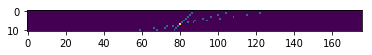

In [4]:
# accumulator matrix
acc = np.zeros([11,176])

# (0,0)
b = -a + 1
for i in range(len(a)):
    acc[a[i]+6,b[i]+80] += 1

# (4,4)
b = -4*a + 4
for i in range(len(a)):
    acc[a[i]+6,b[i]+80] += 1

# (4,4)
b = -7*a + 7
for i in range(len(a)):
    acc[a[i]+6,b[i]+80] += 1
    
plt.imshow(acc)
plt.show()

Comment on the plot 

original script was plotting in 3d space, however it is clear that
we have peak at the yellow dot on the plot above

In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


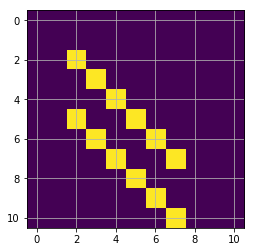

In [2]:
# Hough transform example 1
i = np.zeros([11,11])
for j in range(2,8):
    i[j,j] = 1
    i[j+3,j] = 1
    
plt.imshow(i)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


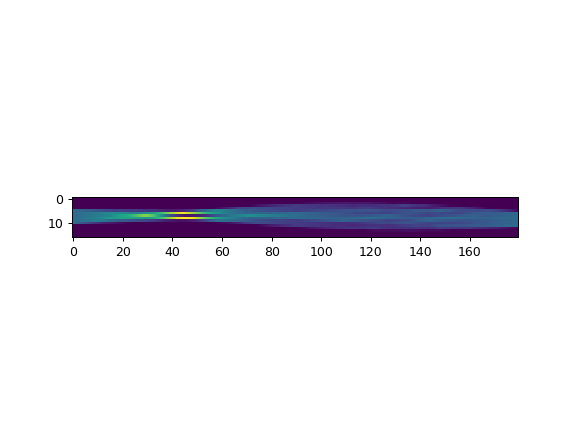

In [8]:
%matplotlib notebook

sinogram = radon(i,np.arange(180),circle=False)

plt.imshow(sinogram)
plt.show()

Comment : The two most intensive sinusoid represents to lines, x axsis in degrees and y axsis distance from the center. it is pretty clear that we have lines at 45 degrees, but **How is distance calcuated? it seems 10 is in the middle??**

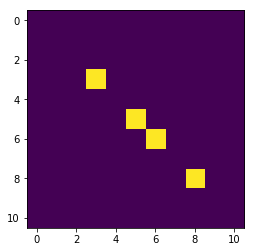

In [15]:
# Hough transfrom example 2
%matplotlib inline
i = np.zeros([11,11])
for j in range(3,9):
  i[j,j] = 1

i[4,4] = 0
i[7,7] = 0

plt.imshow(i)
plt.show()


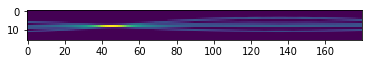

In [18]:
sinogram = radon(i,np.arange(180),circle=False)
plt.imshow(sinogram)
plt.show()

In [25]:
## setup at UIO
import numpy as np
from scipy import ndimage as nd
from matplotlib import pyplot as plt

In [46]:
# Hough example 3
img = plt.imread('corridor.png')
# to 2d array
img = np.dot(img, [1/3,1/3,1/3])




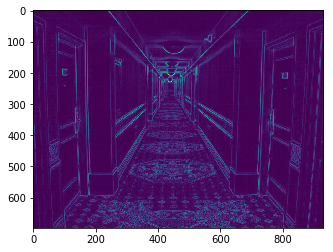

In [50]:
igv = nd.sobel(img)
igh = nd.sobel(img,axis=0)
igs = abs(igv)+abs(igh)
plt.imshow(igs)
plt.show()

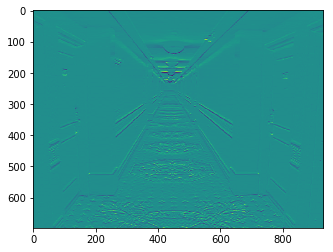

In [49]:
igh = nd.sobel(img,axis=0)

plt.imshow(igh)
plt.show()